In [239]:
# Here we are importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,auc,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

In [241]:
# Here we are importing the files in notebook
df = pd.read_csv("Obesity Classification.csv")

In [243]:
# Here we are seeing the head of the dataset
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [245]:
# Here we are seeing the bottom of the dataset
df.tail()

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight
107,110,31,Male,190,20,8.3,Underweight


In [247]:
# Here we are seeing the info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [249]:
# Here we are using the decribe function
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [251]:
# Here we are seeing the total null values in the dataset
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [253]:
# Here we are seeing the columns of the dataset
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [255]:
# Here we are putting together columns with numerical values so we can find there correlation
df_num = df[[ 'Age','Height', 'Weight', 'BMI']]

In [257]:
# Here we are seeing the correlation between numbers
df_num.corr()

,Age,Height,Weight,BMI
Age,1.000000,-0.076896,0.465106,0.474185
Height,-0.076896,1.000000,0.428890,0.354340
Weight,0.465106,0.428890,1.000000,0.972829
BMI,0.474185,0.354340,0.972829,1.000000


<Axes: >

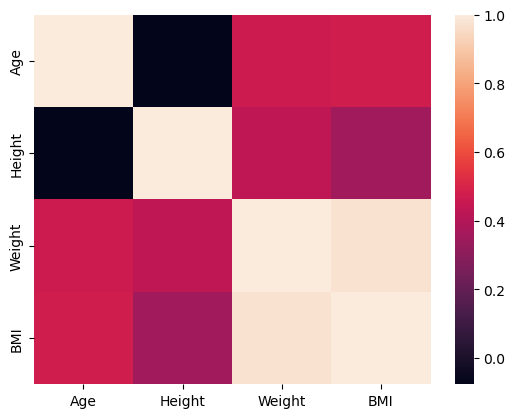

In [111]:
# Here we are seeing the heatmap of numerical values so see the proper relation
sns.heatmap(df_num.corr())

In [259]:
# Here we are seeing that which column to drop and which to keep for training and testing
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [261]:
# Here we puuting all the numerical values which are dependent values
X = df[["Age","Height","Weight","BMI"]]	

In [263]:
# Here we are selecting BMI cause it is independent variable
y=df["Label"]

In [265]:
# Here we are doing the train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.02,random_state=28)

In [269]:
# Here we are seeomg the X train 
X_train

,Age,Height,Weight,BMI
55,102,130,75,25.0
30,24,160,55,21.2
14,38,190,90,27.3
62,36,190,75,24.2
49,72,160,45,18.7
...,...,...,...,...
3,40,150,50,20.0
32,39,190,95,27.0
22,78,180,90,27.3
5,50,140,40,16.7


In [271]:
# Here we are seeing the X_test 
X_test

,Age,Height,Weight,BMI
0,25,175,80,25.3
21,73,160,60,22.5
94,17,160,15,5.6


In [273]:
# Here we are seeing the y_test as it is in strings we will convert it in 0,1 format float like maybe so we will use LabelBinarizer
y_test

0     Normal Weight
21    Normal Weight
94      Underweight
Name: Label, dtype: object

In [275]:
# Here we are putting label Binarizer
y_encoder = pd.factorize(y)[0]

In [277]:
y_train

55       Overweight
30    Normal Weight
14       Overweight
62    Normal Weight
49      Underweight
          ...      
3       Underweight
32       Overweight
22       Overweight
5       Underweight
1     Normal Weight
Name: Label, Length: 105, dtype: object

In [281]:
# Here we are defining the logisticsregression model in model and fitting X_train,y_train 
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [283]:
# Here we are predicting the model on test set 
y_pred = model.predict(X_test)

In [285]:
# Here we using accuracy score to see the score
accuracy_score(y_pred,y_test)

0.6666666666666666

In [287]:
# Here we are seeing the confusion matrix how it is used
confusion_matrix(y_pred,y_test)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [289]:
f1_score(y_pred,y_test,average="macro")

0.5555555555555555

In [293]:
roc_curve(y_pred,y_test,average="macro")

TypeError: got an unexpected keyword argument 'average'

In [295]:
classification_report(y_pred,y_test)

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'               precision    recall  f1-score   support\n\nNormal Weight       0.50      1.00      0.67         1\n   Overweight       0.00      0.00      0.00         1\n  Underweight       1.00      1.00      1.00         1\n\n     accuracy                           0.67         3\n    macro avg       0.50      0.67      0.56         3\n weighted avg       0.50      0.67      0.56         3\n'